# KNN: A from-scratch implementation of the K-Nearest Neighbors algorithm
This notebook provides a from-scratch implementation of the K-Nearest Neighbors (KNN) algorithm, a simple yet powerful machine learning technique used for classification and regression tasks. The KNN algorithm works by finding the K closest data points to a given input and making predictions based on the majority class (for classification) or the average value (for regression) of those neighbors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Basic KNN Implementations

First we will create a simple classification dataset using `make_gaussian_quantiles` from `sklearn.datasets` and apply KNN to classify the data points. We will also visualize the dataset to understand its structure before implementing the KNN algorithm.

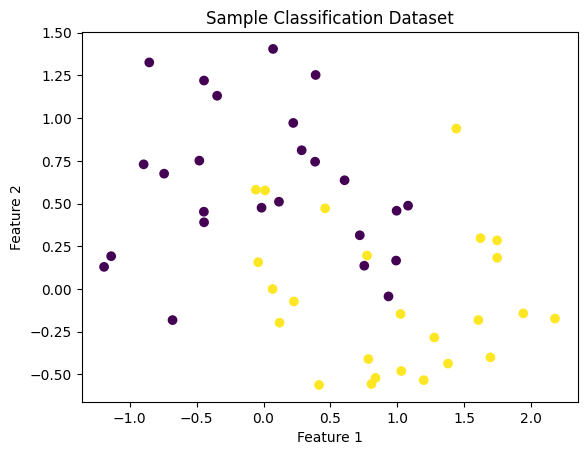

In [2]:
# Create a simple classification dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=50, noise=0.25, random_state=1)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Sample Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### KNN for classification
The KNN algorithm for classification works as follows:
1. Choose the number of neighbors K.
2. For a given input, calculate the distance from the input to all data points in the training set.
3. Sort the distances and determine the K nearest neighbors.
4. For classification, the predicted class is the majority class among the K nearest neighbors.

In [3]:
def knn_predict(X_train, y_train, X_test, k=3, distance_metric='euclidean'):
    """
    Predict the class labels for the test set using the KNN algorithm.
    
    Parameters:
    X_train: Training data features
    y_train: Training data labels
    X_test: Test data features
    k: Number of nearest neighbors to consider
    distance_metric: Distance metric to use ('euclidean' or 'manhattan')
    
    Returns:
    Predicted class labels for the test set
    """
    predictions = []
    
    for test_point in X_test:
        # Calculate distances from the test point to all training points
        if distance_metric == 'euclidean':
            distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        elif distance_metric == 'manhattan':
            distances = np.sum(np.abs(X_train - test_point), axis=1)
        else:
            raise ValueError("Unsupported distance metric")
        
        # Get the indices of the K nearest neighbors
        neighbor_indices = np.argsort(distances)[:k]
        
        # Get the labels of the K nearest neighbors
        neighbor_labels = y_train[neighbor_indices]
        
        # Predict the majority class among the neighbors
        predicted_label = np.bincount(neighbor_labels).argmax()
        predictions.append(predicted_label)
    
    return np.array(predictions)

In [4]:
# Visualize the decision boundaries of KNN
def plot_decision_boundaries(X, y, k=3, distance_metric='euclidean', ax=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    Z = knn_predict(X, y, np.c_[xx.ravel(), yy.ravel()], k=k, distance_metric=distance_metric)
    Z = Z.reshape(xx.shape)

    if ax is None:
        fig, ax = plt.subplots()
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(f'KNN Decision Boundaries \n(k={k}, distance={distance_metric})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    return ax

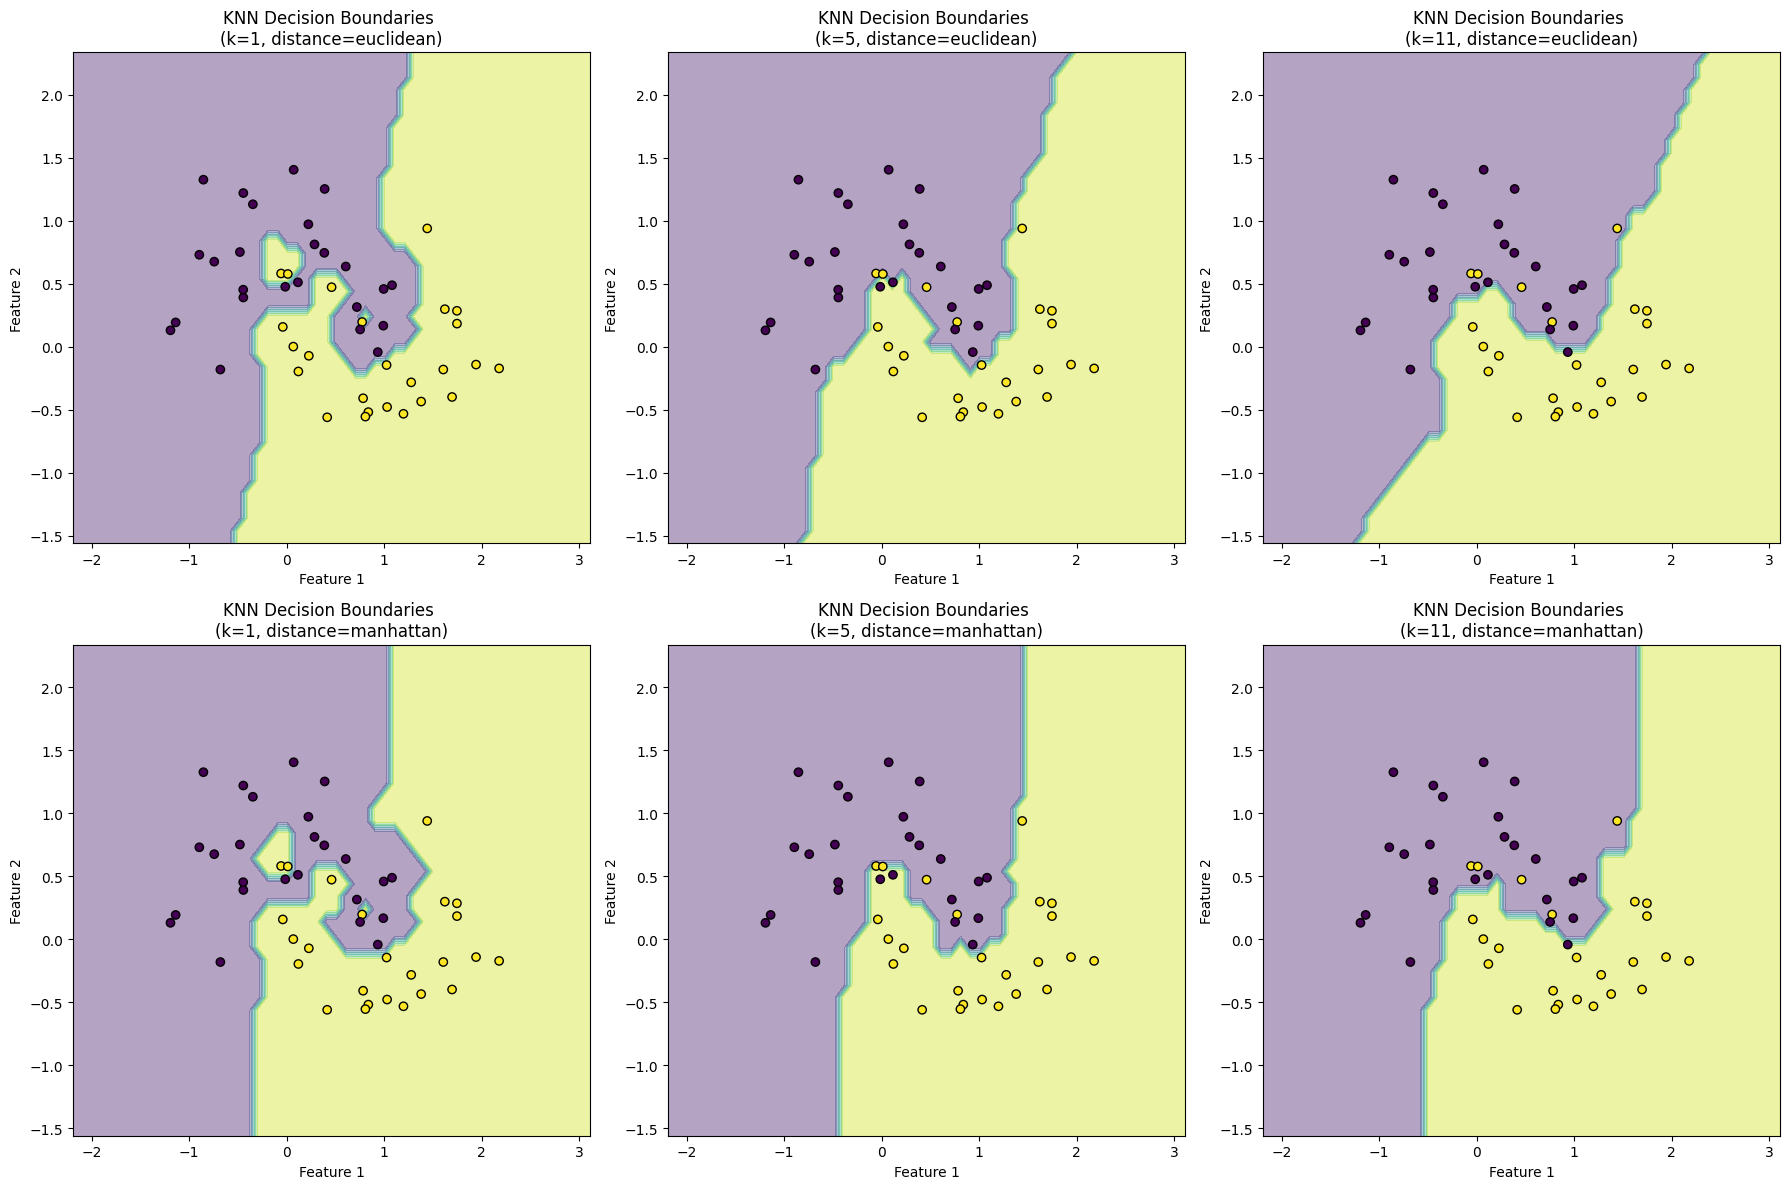

In [5]:
# Plot decision boundaries for different KNN configurations
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
plot_decision_boundaries(X, y, k=1, distance_metric='euclidean', ax=axs[0, 0])
plot_decision_boundaries(X, y, k=5, distance_metric='euclidean', ax=axs[0, 1])
plot_decision_boundaries(X, y, k=11, distance_metric='euclidean', ax=axs[0, 2])
plot_decision_boundaries(X, y, k=1, distance_metric='manhattan', ax=axs[1, 0])
plot_decision_boundaries(X, y, k=5, distance_metric='manhattan', ax=axs[1, 1])
plot_decision_boundaries(X, y, k=11, distance_metric='manhattan', ax=axs[1, 2])
plt.tight_layout()
plt.show()

### KNN for Regression
The KNN algorithm for regression is similar to classification, but instead of predicting the majority class, it predicts the average value of the K nearest neighbors. The steps are as follows:
1. Choose the number of neighbors K.
2. For a given input, calculate the distance from the input to all data points in the training set.
3. Sort the distances and determine the K nearest neighbors.
4. For regression, the predicted value is the average of the target values of the K nearest neighbors.

In [6]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Lets use the first 2 numerical features, sepal length and sepal width, and take the target variable as categorical input
y_iris_regression = X_iris[:, 1]  # Use sepal width as the target variable for regression
X_iris = np.concatenate((X_iris[:, 0].reshape(-1, 1), y_iris.reshape(-1, 1)), axis=1)

iris_dataset = pd.DataFrame(X_iris, columns=['Sepal Length', 'Species'])
iris_dataset['Sepal Width'] = y_iris_regression

iris_dataset.reset_index(drop=True, inplace=True)

In [7]:
print(f"Number of input features: {X_iris.shape[1]}")
print(f"Number of total samples: {len(y_iris)}")

Number of input features: 2
Number of total samples: 150


In [8]:
rnd_ix = np.random.permutation(len(iris_dataset))
ix_train = rnd_ix[:120]
ix_test = rnd_ix[120:]

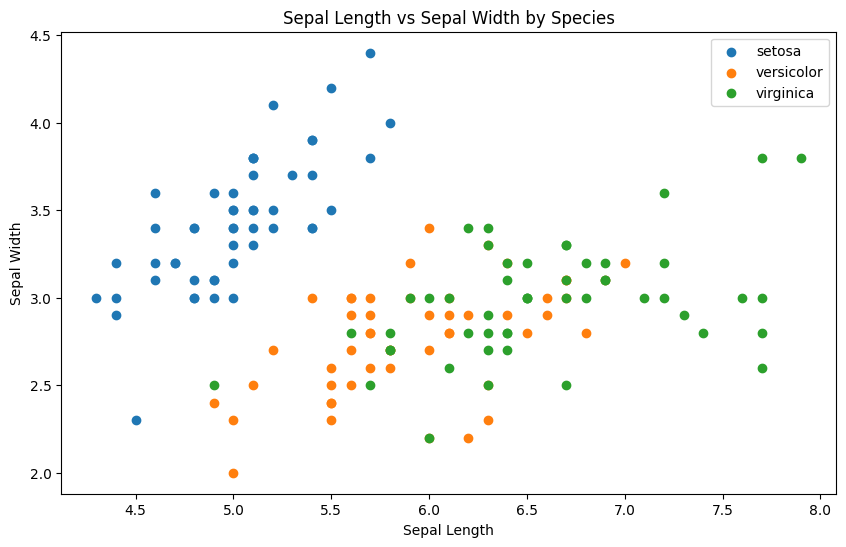

In [9]:
# plot target  variable against sepal width for each class
plt.figure(figsize=(10, 6))
for species in iris_dataset['Species'].unique():
    subset = iris_dataset.query("Species == @species")
    plt.scatter(subset['Sepal Length'], subset['Sepal Width'], label=iris.target_names[int(species)])
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

#### One-hot encode the categorical variable to make it suitable for KNN

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_iris_encoded = encoder.fit_transform(X_iris[:, 1].reshape(-1, 1))
X_iris_encoded = np.concatenate((X_iris[:, 0].reshape(-1, 1), X_iris_encoded), axis=1)

iris_dataset = pd.DataFrame(X_iris_encoded, columns=['Sepal Length', 'Setosa', 'Versicolor', 'Virginica'])
iris_dataset['Sepal Width'] = y_iris_regression

In [11]:
iris_dataset.head()

,Sepal Length,Setosa,Versicolor,Virginica,Sepal Width
0,5.1,1.0,0.0,0.0,3.5
1,4.9,1.0,0.0,0.0,3.0
2,4.7,1.0,0.0,0.0,3.2
3,4.6,1.0,0.0,0.0,3.1
4,5.0,1.0,0.0,0.0,3.6


#### Standardize the features to ensure that all features contribute equally to the distance calculations in KNN

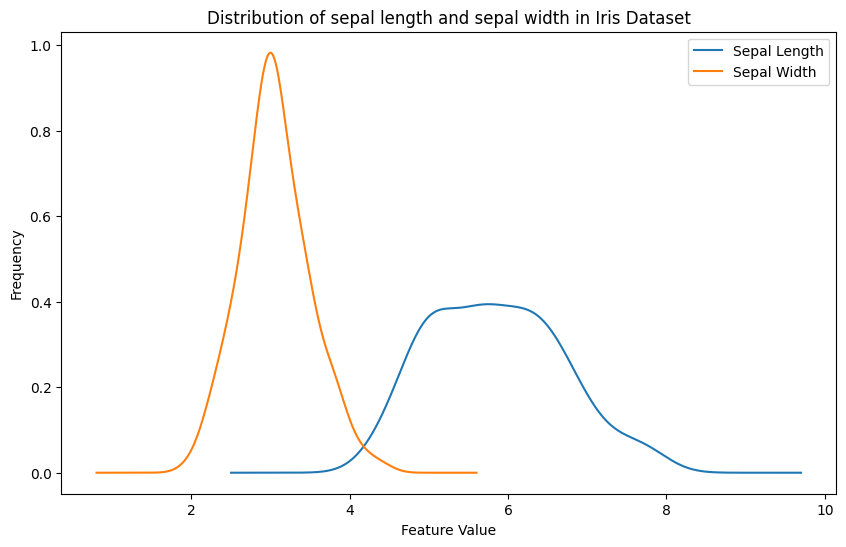

In [12]:
# Plot the distribution of sepal length and sepal width
iris_dataset[['Sepal Length', 'Sepal Width']].plot.density(figsize=(10, 6))
plt.title('Distribution of sepal length and sepal width in Iris Dataset')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Standardize the features to ensure that all features contribute equally to the distance calculations in KNN using training data statistics
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
iris_dataset.loc[ix_train, ['Sepal Length', 'Sepal Width']] = scaler.fit_transform(iris_dataset.iloc[ix_train][['Sepal Length', 'Sepal Width']])
iris_dataset.loc[ix_test, ['Sepal Length', 'Sepal Width']]  = scaler.transform(iris_dataset.iloc[ix_test][['Sepal Length', 'Sepal Width']])

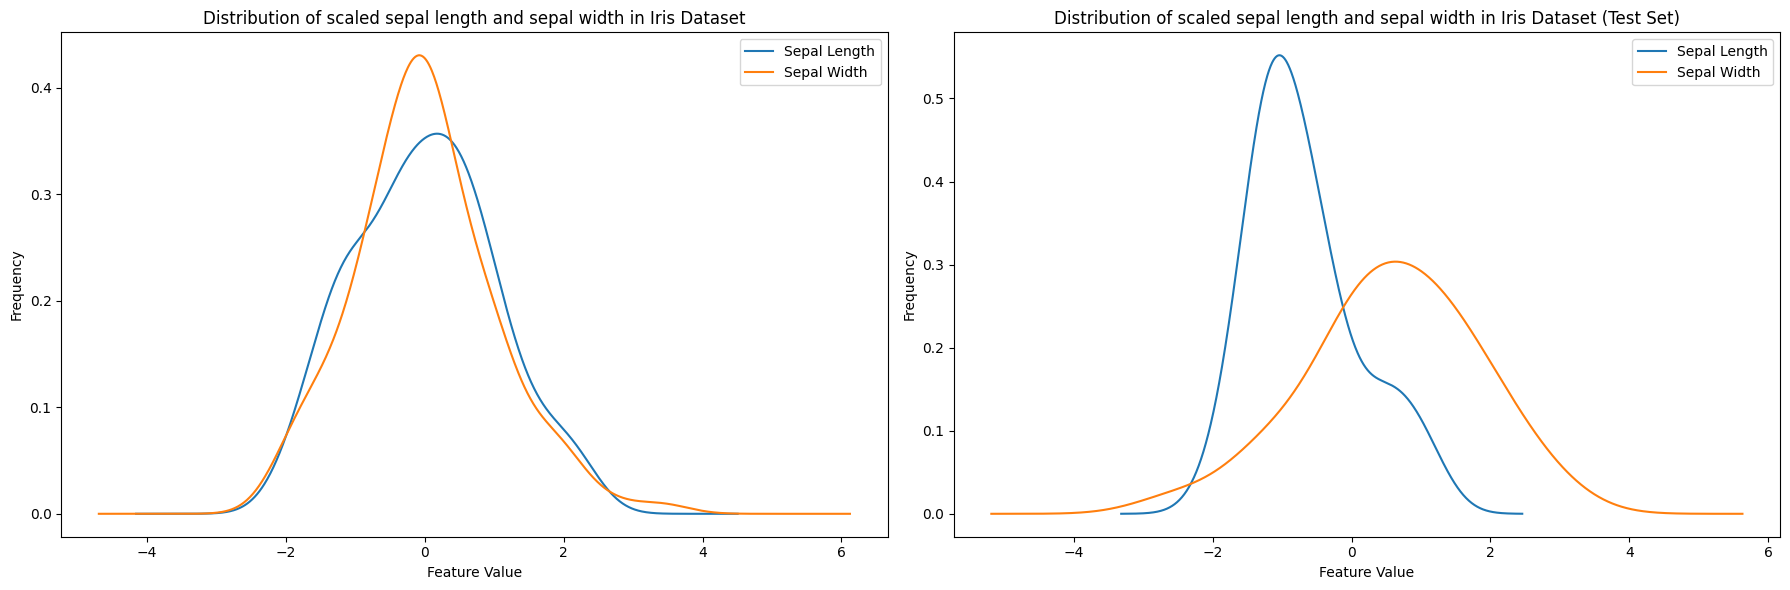

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))


iris_dataset.iloc[ix_train][['Sepal Length', 'Sepal Width']].plot.density(ax=axs[0])
axs[0].set_title('Distribution of scaled sepal length and sepal width in Iris Dataset')
axs[0].set_xlabel('Feature Value')
axs[0].set_ylabel('Frequency')


iris_dataset.iloc[ix_test][['Sepal Length', 'Sepal Width']].plot.density(ax=axs[1])
axs[1].set_title('Distribution of scaled sepal length and sepal width in Iris Dataset (Test Set)')
axs[1].set_xlabel('Feature Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Evaluate the model

In [15]:
iris_dataset.head()

,Sepal Length,Setosa,Versicolor,Virginica,Sepal Width
0,-1.030965,1.0,0.0,0.0,1.204837
1,-1.271657,1.0,0.0,0.0,-0.024589
2,-1.512350,1.0,0.0,0.0,0.467182
3,-1.632696,1.0,0.0,0.0,0.221297
4,-1.151311,1.0,0.0,0.0,1.450722


In [16]:
input_features = ['Sepal Length', 'Setosa', 'Versicolor', 'Virginica']
target_variable = 'Sepal Width'

In [30]:
def knn_regression_predict(X_train, y_train, X_test, k=7):
    """
    Predict the target values for the test set using the KNN regression algorithm.
    
    Parameters:
    X_train: Training data features
    y_train: Training data target values
    X_test: Test data features
    k: Number of nearest neighbors to consider
    
    Returns:
    Predicted target values for the test set
    """
    predictions = []
    
    for test_point in X_test:
        # Calculate distances from the test point to all training points
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        
        # Get the indices of the K nearest neighbors
        neighbor_indices = np.argsort(distances)[:k]
        
        # Get the target values of the K nearest neighbors
        neighbor_targets = y_train[neighbor_indices]
        
        # Predict the average target value among the neighbors
        predicted_value = np.mean(neighbor_targets)
        predictions.append(predicted_value)
    
    return np.array(predictions)

In [31]:
iris_dataset[input_features].iloc[ix_train]

,Sepal Length,Setosa,Versicolor,Virginica
98,-1.030965,0.0,1.0,0.0
58,0.774227,0.0,1.0,0.0
57,-1.271657,0.0,1.0,0.0
54,0.653881,0.0,1.0,0.0
31,-0.669927,1.0,0.0,0.0
...,...,...,...,...
65,0.894573,0.0,1.0,0.0
149,-0.068196,0.0,0.0,1.0
71,0.172496,0.0,1.0,0.0
95,-0.308888,0.0,1.0,0.0


In [32]:
# Compute KNN regression predictions on the test set
y_test_pred = knn_regression_predict(iris_dataset[input_features].iloc[ix_train].values, iris_dataset[target_variable].iloc[ix_train].values, iris_dataset[input_features].iloc[ix_test].values)
print(f"Mean Squared Error on Test Set: {np.mean((y_test_pred - iris_dataset[target_variable].iloc[ix_test].values) ** 2)}")

Mean Squared Error on Test Set: 0.4564074722996817


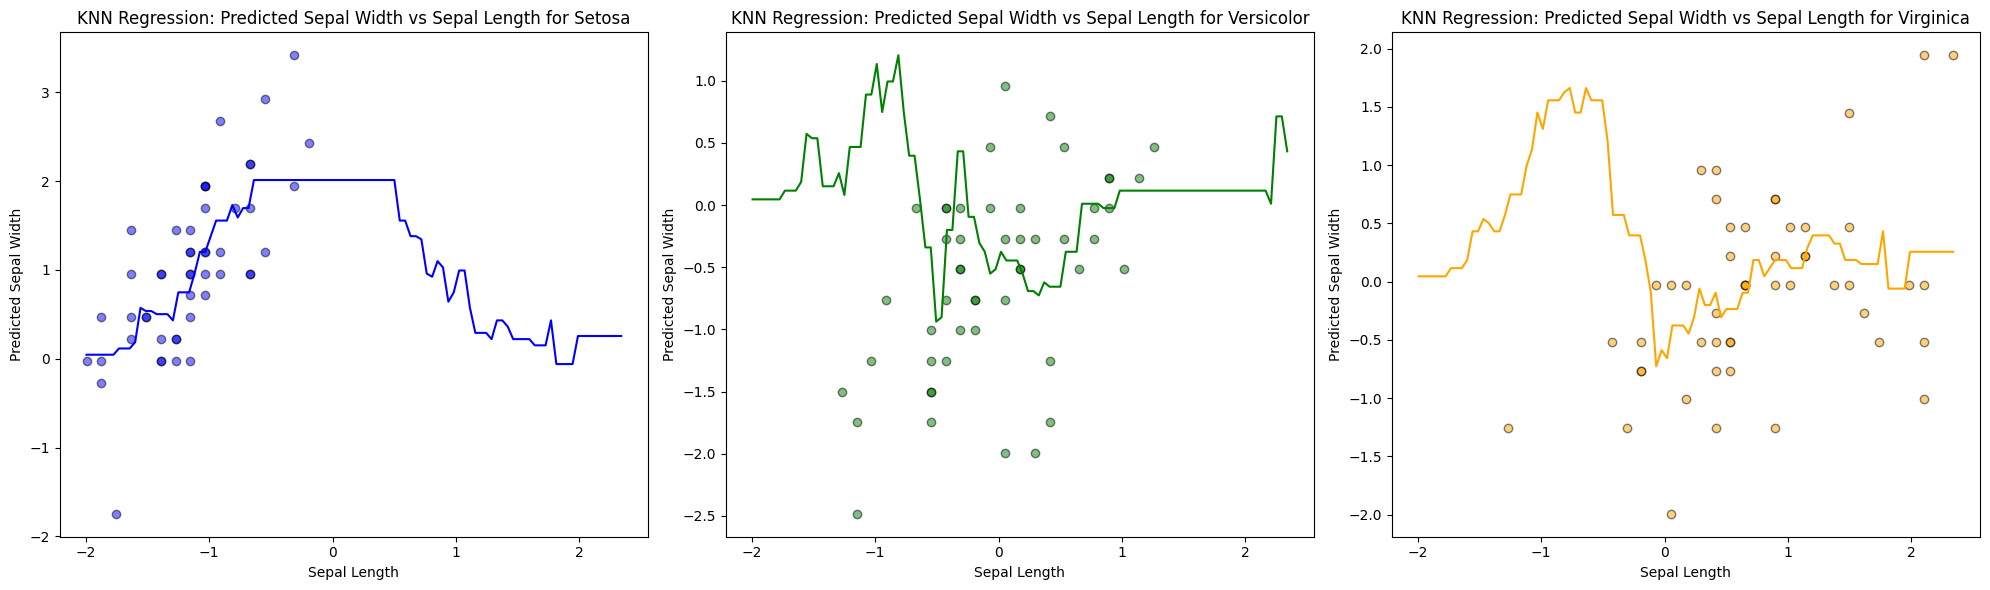

In [36]:
# Visualize learn function
X_test = np.linspace(iris_dataset['Sepal Length'].min(), iris_dataset['Sepal Length'].max(), 100).reshape(-1, 1)
X_test_encoded = encoder.transform(np.zeros((100, 1)))  # Dummy encoding for the categorical features
X_test_encoded = np.concatenate((X_test, X_test_encoded), axis=1)
X_test_encoded = np.tile(X_test_encoded, (3, 1))  # Repeat the dummy encoding for category
X_test_encoded[:100, 1] = 1  # Set the first 100 samples to belong to the first category (Setosa)
X_test_encoded[100:200, 2] = 1  # Set the next 100 samples to belong to the second category (Versicolor)
X_test_encoded[200:, 3] = 1  # Set the last 100 samples to belong to the third category (Virginica)
y_test_pred = knn_regression_predict(iris_dataset[input_features].iloc[ix_train].values, iris_dataset[target_variable].iloc[ix_train].values, X_test_encoded)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].plot(X_test_encoded[:100, 0], y_test_pred[:100], label='Setosa', c='blue')
axs[1].plot(X_test_encoded[100:200, 0], y_test_pred[100:200], label='Versicolor', c='green')
axs[2].plot(X_test_encoded[200:, 0], y_test_pred[200:], label='Virginica', c='orange')
colors = ['blue', 'green', 'orange']
for i, species in enumerate(['Setosa', 'Versicolor', 'Virginica']):
    subset = iris_dataset[iris_dataset[species] == 1]
    axs[i].scatter(subset['Sepal Length'], subset['Sepal Width'], label=species, edgecolor='k', marker='o', alpha=0.5, c=colors[i])
    axs[i].set_title(f'KNN Regression: Predicted Sepal Width vs Sepal Length for {species}')
    axs[i].set_xlabel('Sepal Length')
    axs[i].set_ylabel('Predicted Sepal Width')
plt.tight_layout()
plt.show()